<a href="https://colab.research.google.com/github/shadiyahamza/assignment/blob/main/crop_yield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,BaggingRegressor,AdaBoostRegressor,StackingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


#Loading dataset

In [ ]:
df_agr=pd.read_csv('/content/crop_yield.csv',na_values=["nan", "NaN", "NULL", "N/A"])

/tmp/ipython-input-1029293781.py:1: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_agr=pd.read_csv('/content/crop_yield.csv',na_values=["nan", "NaN", "NULL", "N/A"])


In [ ]:
df_agr.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122.0,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140.0,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106.0,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146.0,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110.0,7.248251


#EDA

In [ ]:
df_agr.columns

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')

In [ ]:
df_agr.shape

(67358, 10)

In [ ]:
df_agr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67358 entries, 0 to 67357
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Region                  67358 non-null  object 
 1   Soil_Type               67358 non-null  object 
 2   Crop                    67358 non-null  object 
 3   Rainfall_mm             67358 non-null  float64
 4   Temperature_Celsius     67357 non-null  float64
 5   Fertilizer_Used         67357 non-null  object 
 6   Irrigation_Used         67357 non-null  object 
 7   Weather_Condition       67357 non-null  object 
 8   Days_to_Harvest         67357 non-null  float64
 9   Yield_tons_per_hectare  67357 non-null  float64
dtypes: float64(4), object(6)
memory usage: 5.1+ MB


In [ ]:
df_agr.describe(include="all")

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
count,67358,67358,67358,67358.000000,67357.000000,67357,67357,67357,67357.000000,67357.000000
unique,4,6,6,NaN,NaN,2,2,3,NaN,NaN
top,West,Silt,Wheat,NaN,NaN,False,True,Sunny,NaN,NaN
freq,16905,11419,11354,NaN,NaN,33689,33707,22679,NaN,NaN
mean,NaN,NaN,NaN,548.363543,27.473795,NaN,NaN,NaN,104.502576,4.641039
std,NaN,NaN,NaN,259.416131,7.204925,NaN,NaN,NaN,26.011245,1.694722
min,NaN,NaN,NaN,85.000000,15.000202,NaN,NaN,NaN,60.000000,-0.469229
25%,NaN,NaN,NaN,324.030562,21.243285,NaN,NaN,NaN,82.000000,3.411188
50%,NaN,NaN,NaN,548.146789,27.504273,NaN,NaN,NaN,104.000000,4.645821
75%,NaN,NaN,NaN,772.507801,33.696847,NaN,NaN,NaN,127.000000,5.862604


In [ ]:
df_agr.isnull().sum() / len(df_agr) * 100   # percentage missing

,0
Region,0.000000
Soil_Type,0.000000
Crop,0.000000
Rainfall_mm,0.000000
Temperature_Celsius,0.001485
Fertilizer_Used,0.001485
Irrigation_Used,0.001485
Weather_Condition,0.001485
Days_to_Harvest,0.001485
Yield_tons_per_hectare,0.001485


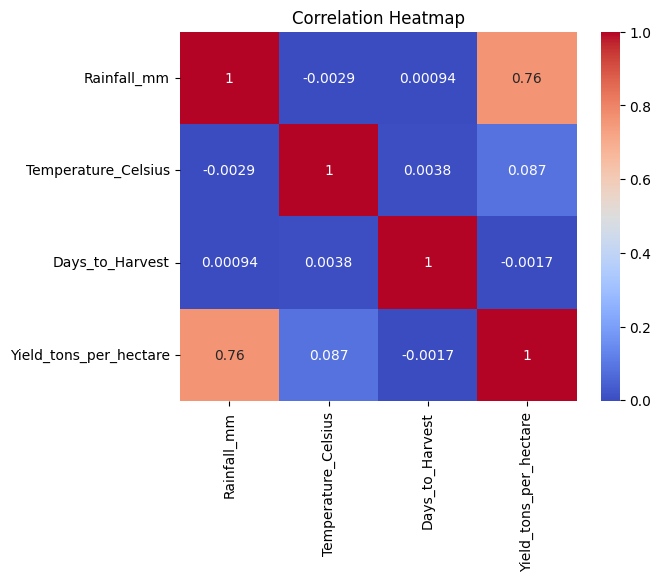

In [ ]:
num_features = ["Rainfall_mm", "Temperature_Celsius", "Days_to_Harvest"]

# Correlation heatmap
corr = df_agr[num_features + ["Yield_tons_per_hectare"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Rainfall_mm Yield_tons_per_hectare = 0.76
Strong positive correlation. More rainfall tends to increase yield.

Temperature_Celsius Yield = 0.086
Very weak relationship almost negligible


Days_to_Harvest  Yield = -0.026
Almost no relationship.

preprocessing

#missing value checking

In [ ]:
#checking for null values in each columns
df_agr.isnull().sum()

,0
Region,0
Soil_Type,0
Crop,0
Rainfall_mm,0
Temperature_Celsius,1
Fertilizer_Used,1
Irrigation_Used,1
Weather_Condition,1
Days_to_Harvest,1
Yield_tons_per_hectare,1


#Outlier analysis

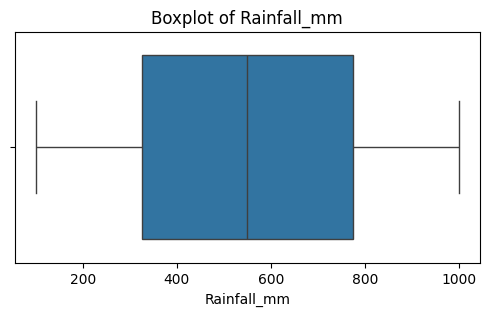

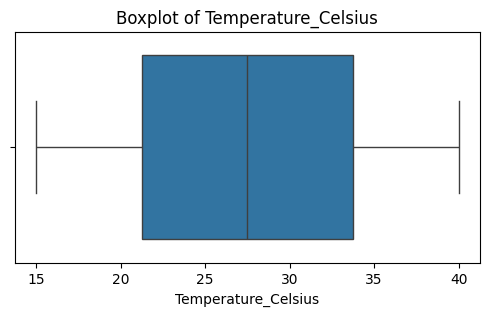

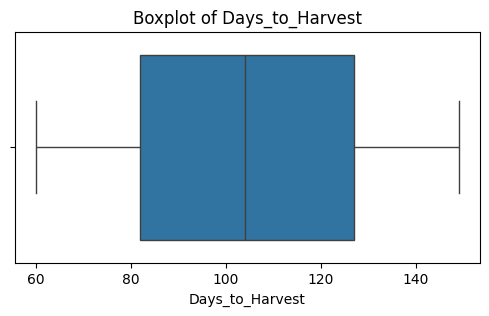

In [ ]:
#extracted the numeric columns
num_cols = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest',]

#plotted each of the numerical values
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df_agr[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


Numerically checking for outliers

In [ ]:
for col in num_cols:
  Q1 = df_agr[col].quantile(0.25)
  Q3 = df_agr[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR

  outliers = df_agr[(df_agr[col] < lower) | (df_agr[col] > upper)]
  print(f"{col}: {len(outliers)} outliers")

Rainfall_mm: 0 outliers
Temperature_Celsius: 0 outliers
Days_to_Harvest: 0 outliers


#Encoding categrical values

In [ ]:
df_agr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


Region(one hot)

In [ ]:
df_agr['Region'].unique()

array(['West', 'South', 'North', 'East'], dtype=object)

In [ ]:
#one hot encoding is to be done since there is no order or value difference between these directions
df_agr=pd.get_dummies(df_agr, columns=['Region'],dtype=int)
#


In [ ]:
df_agr.head()

,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare,Region_East,Region_North,Region_South,Region_West
0,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816,0,0,0,1
1,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341,0,0,1,0
2,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443,0,1,0,0
3,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573,0,1,0,0
4,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251,0,0,1,0


Soil Type(one hot)

In [ ]:
df_agr['Soil_Type'].unique()

array(['Sandy', 'Clay', 'Loam', 'Silt', 'Peaty', 'Chalky'], dtype=object)

In [ ]:
#one hot encoding is to be done since there is no order or value difference between these categories
df_agr=pd.get_dummies(df_agr, columns=['Soil_Type'],dtype=int)


In [ ]:
df_agr.head()

,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare,Region_East,Region_North,Region_South,Region_West,Soil_Type_Chalky,Soil_Type_Clay,Soil_Type_Loam,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silt
0,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816,0,0,0,1,0,0,0,0,1,0
1,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341,0,0,1,0,0,1,0,0,0,0
2,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443,0,1,0,0,0,0,1,0,0,0
3,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573,0,1,0,0,0,0,0,0,1,0
4,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251,0,0,1,0,0,0,0,0,0,1


crop(one hot)

In [ ]:
df_agr['Crop'].unique()

array(['Cotton', 'Rice', 'Barley', 'Soybean', 'Wheat', 'Maize'],
      dtype=object)

In [ ]:
#one hot encoding is to be done since there is no order or value difference between these categories
df_agr=pd.get_dummies(df_agr, columns=['Crop'],dtype=int)


In [ ]:
df_agr.head()

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare,Region_East,Region_North,Region_South,...,Soil_Type_Loam,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silt,Crop_Barley,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat
0,897.077239,27.676966,False,True,Cloudy,122,6.555816,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,992.673282,18.026142,True,True,Rainy,140,8.527341,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,147.998025,29.794042,False,False,Sunny,106,1.127443,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3,986.866331,16.644190,False,True,Rainy,146,6.517573,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,730.379174,31.620687,True,True,Cloudy,110,7.248251,0,0,1,...,0,0,0,1,0,0,0,0,0,1


wheather condition

In [ ]:
df_agr['Weather_Condition'].unique()

array(['Cloudy', 'Rainy', 'Sunny'], dtype=object)

In [ ]:
#one hot encoding is to be done since there is no order or value difference between these categories
df_agr=pd.get_dummies(df_agr, columns=['Weather_Condition'],dtype=int)


In [ ]:
df_agr.head()

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare,Region_East,Region_North,Region_South,Region_West,...,Soil_Type_Silt,Crop_Barley,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny
0,897.077239,27.676966,False,True,122,6.555816,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,992.673282,18.026142,True,True,140,8.527341,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,147.998025,29.794042,False,False,106,1.127443,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,986.866331,16.644190,False,True,146,6.517573,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,730.379174,31.620687,True,True,110,7.248251,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0


converting boolean to int for Fertilizer_Used and Irrigation_Used

In [ ]:
for col in ["Fertilizer_Used", "Irrigation_Used"]:
    df_agr[col] = df_agr[col].fillna(df_agr[col].mode()[0])
df_agr[["Fertilizer_Used", "Irrigation_Used"]] = df_agr[["Fertilizer_Used", "Irrigation_Used"]].astype(int)

In [ ]:
df_agr.head()

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare,Region_East,Region_North,Region_South,Region_West,...,Soil_Type_Silt,Crop_Barley,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny
0,897.077239,27.676966,0,1,122,6.555816,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,992.673282,18.026142,1,1,140,8.527341,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,147.998025,29.794042,0,0,106,1.127443,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,986.866331,16.644190,0,1,146,6.517573,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,730.379174,31.620687,1,1,110,7.248251,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0


#scaling

In [ ]:
df_agr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Rainfall_mm               1000000 non-null  float64
 1   Temperature_Celsius       1000000 non-null  float64
 2   Fertilizer_Used           1000000 non-null  int64  
 3   Irrigation_Used           1000000 non-null  int64  
 4   Days_to_Harvest           1000000 non-null  float64
 5   Yield_tons_per_hectare    1000000 non-null  float64
 6   Region_East               1000000 non-null  int64  
 7   Region_North              1000000 non-null  int64  
 8   Region_South              1000000 non-null  int64  
 9   Region_West               1000000 non-null  int64  
 10  Soil_Type_Chalky          1000000 non-null  int64  
 11  Soil_Type_Clay            1000000 non-null  int64  
 12  Soil_Type_Loam            1000000 non-null  int64  
 13  Soil_Type_Peaty           10

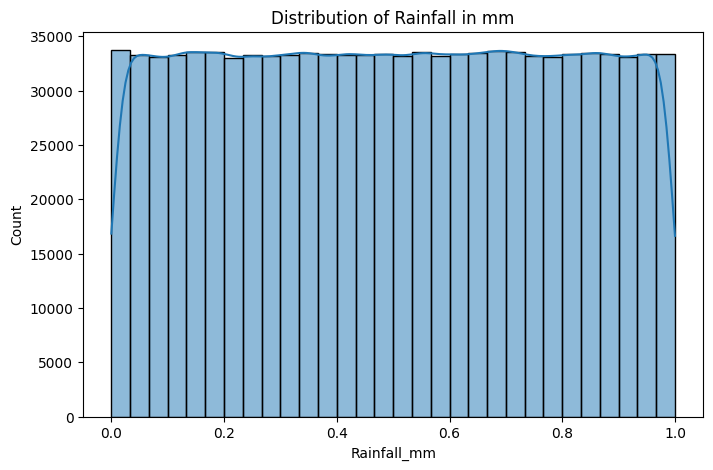

In [ ]:
#checking the distribution of the variables
plt.figure(figsize=(8,5))
sns.histplot(df_agr["Rainfall_mm"], kde=True, bins=30)
plt.title("Distribution of Rainfall in mm")
plt.show()

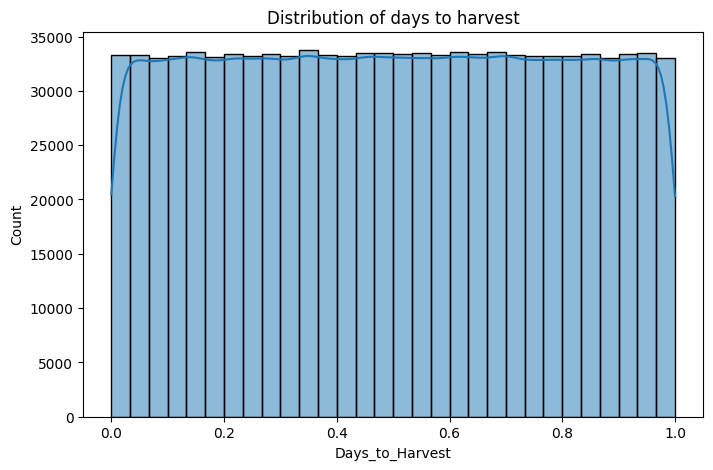

In [ ]:
#checking the distribution of the variables
plt.figure(figsize=(8,5))
sns.histplot(df_agr["Days_to_Harvest"], kde=True, bins=30)
plt.title("Distribution of days to harvest")
plt.show()

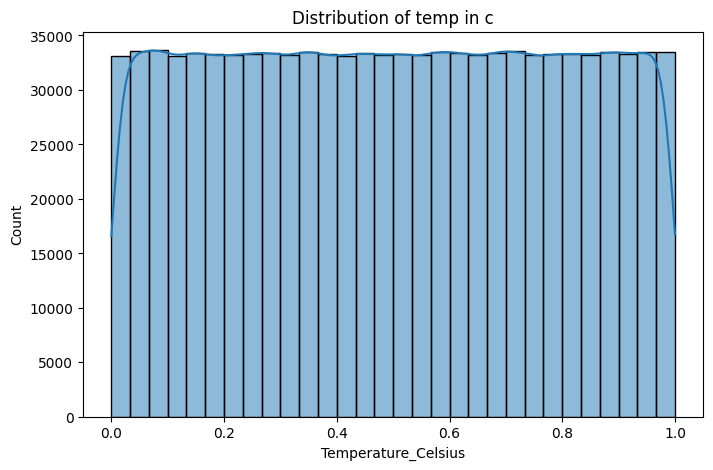

In [ ]:
#checking the distribution of the variables
plt.figure(figsize=(8,5))
sns.histplot(df_agr["Temperature_Celsius"], kde=True, bins=30)
plt.title("Distribution of temp in c")
plt.show()

In [ ]:
#the columns which are only needed to be scaled
#here the min max scaler is used inorder to make the values fall between 0 and 1
scale_cols = ["Rainfall_mm", "Temperature_Celsius", "Days_to_Harvest"]

In [ ]:
#initislizing minmax scaler
scaler = MinMaxScaler()
df_agr[scale_cols] = scaler.fit_transform(df_agr[scale_cols])


In [ ]:
df_agr.head()

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare,Region_East,Region_North,Region_South,Region_West,...,Soil_Type_Silt,Crop_Barley,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny
0,0.885643,0.507078,0,1,0.696629,6.555816,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,0.991861,0.121045,1,1,0.898876,8.527341,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0.053330,0.591761,0,0,0.516854,1.127443,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0.985409,0.065766,0,1,0.966292,6.517573,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0.700422,0.664827,1,1,0.561798,7.248251,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0


#Model building

Train test split

In [ ]:

# Features (X) and Target (y)
X = df_agr.drop("Yield_tons_per_hectare", axis=1)
y = df_agr["Yield_tons_per_hectare"]

#Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Linear Regression model

In [ ]:

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#R², MAE, RMSE to check performance
LR_r2 = r2_score(y_test, y_pred)
LR_mae = mean_absolute_error(y_test, y_pred)
LR_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", LR_r2)
print("MAE:", LR_mae)
print("RMSE:", LR_rmse)


R² Score: 0.9130137709140372
MAE: 0.3995540808713492
RMSE: 0.5007760662930834


Random Forest regressor

In [ ]:
# Train model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predictions
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluation
RF_r2 = r2_score(y_test, y_pred_rf)
RF_mae = mean_absolute_error(y_test, y_pred_rf)
RF_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest Regressor")
print("R² Score:", RF_r2)
print("MAE:", RF_mae)
print("RMSE:", RF_rmse)

Random Forest Regressor
R² Score: 0.9077432018554721
MAE: 0.41152043759496454
RMSE: 0.5157241885342465


Gradient Boosting Regressor

In [ ]:
# Train model
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
# Predictions
y_pred_gb = gb_model.predict(X_test)


In [ ]:
# Evaluation
GB_r2 = r2_score(y_test, y_pred_gb)
GB_mae = mean_absolute_error(y_test, y_pred_gb)
GB_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))

print("Gradient Boosting Regressor")
print("R² Score:", GB_r2)
print("MAE:", GB_mae)
print("RMSE:", GB_rmse)

Gradient Boosting Regressor
R² Score: 0.9124559208178762
MAE: 0.40085933041749267
RMSE: 0.5023792598300351


XGBoost model

In [ ]:
# Train model
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Predictions
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
# Evaluation
XG_r2 = r2_score(y_test, y_pred_xgb)
XG_mae = mean_absolute_error(y_test, y_pred_xgb)
XG_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("XGBoost Regressor")
print("R² Score:", XG_r2)
print("MAE:", XG_mae)
print("RMSE:", XG_rmse)

XGBoost Regressor
R² Score: 0.9128064560893365
MAE: 0.40006105884237875
RMSE: 0.501372462523779


In [ ]:
# Create comparison matrix
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting", "XGBoost"],
    "R² Score": [LR_r2, RF_r2, GB_r2, XG_r2],
    "MAE": [LR_mae, RF_mae, GB_mae, XG_mae],
    "RMSE": [LR_rmse, RF_rmse, GB_rmse, XG_rmse]
})
comparison

,Model,R² Score,MAE,RMSE
0,Linear Regression,0.913014,0.399554,0.500776
1,Random Forest,0.907743,0.411520,0.515724
2,Gradient Boosting,0.912456,0.400859,0.502379
3,XGBoost,0.912806,0.400061,0.501372


Since the linear Regression is the best among 4 which has highest Rsq value,lowest mse and mae

#fine tuning

In [ ]:

# Define models
ridge = Ridge()
lasso = Lasso(max_iter=10000)   # max_iter increased for stability
elastic = ElasticNet(max_iter=10000)

# Define parameter grids
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
elastic_params = {
    'alpha': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.2, 0.5, 0.8]  # mix between Lasso and Ridge
}

# GridSearch for each model
ridge_search = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
lasso_search = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')
elastic_search = GridSearchCV(elastic, elastic_params, cv=5, scoring='r2')

# Fit models
ridge_search.fit(X_train, y_train)
lasso_search.fit(X_train, y_train)
elastic_search.fit(X_train, y_train)

# Evaluate best models on test set
models = {
    "Ridge": ridge_search,
    "Lasso": lasso_search,
    "ElasticNet": elastic_search
}

for name, search in models.items():
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test)

    print(f"--- {name} ---")
    print("Best Params:", search.best_params_)
    print("Test R²:", r2_score(y_test, y_pred))
    print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("Test MAE:", mean_absolute_error(y_test, y_pred))
    print()


--- Ridge ---
Best Params: {'alpha': 0.1}
Test R²: 0.9130137700403014
Test RMSE: 0.5007760688081139
Test MAE: 0.3995540827268693

--- Lasso ---
Best Params: {'alpha': 0.01}
Test R²: 0.9118671642782921
Test RMSE: 0.504065744198266
Test MAE: 0.4021821314293719

--- ElasticNet ---
Best Params: {'alpha': 0.01, 'l1_ratio': 0.8}
Test R²: 0.9111895423974229
Test RMSE: 0.5059998243971585
Test MAE: 0.40373665991744956



#Cross Validation

In [ ]:

model = LinearRegression()

# 5-fold CV with R² scoring
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

print("Cross-validation R² scores:", scores)
print("Mean R²:", np.mean(scores))


Cross-validation R² scores: [0.91322754 0.91279017 0.91298458 0.91221674 0.91361016]
Mean R²: 0.912965838841567


#Bagging

In [ ]:
# Base model
base_model = LinearRegression()

# Bagging model
bagging_model = BaggingRegressor(
    estimator=base_model,
    n_estimators=50,        # number of models to train
    random_state=42,
    n_jobs=-1
)

# Train bagging model
bagging_model.fit(X_train, y_train)

# Predictions
y_pred_bag = bagging_model.predict(X_test)

# Evaluation
bag_r2 = r2_score(y_test, y_pred_bag)
bag_mae = mean_absolute_error(y_test, y_pred_bag)
bag_rmse = np.sqrt(mean_squared_error(y_test, y_pred_bag))

print("--- Bagging with Linear Regression ---")
print("R²:", bag_r2)
print("MAE:", bag_mae)
print("RMSE:", bag_rmse)

--- Bagging with Linear Regression ---
R²: 0.9130141100377726
MAE: 0.3995527739758481
RMSE: 0.5007750901315837


Linear Regression is already a very stable model. Bagging doesn’t really help much here .bagging confirmed your model is already robust and stable.

Plain Linear Regression:

R²: 0.9130137709140372
MAE: 0.3995540808713493
RMSE: 0.5007760662930835

Bagging with Linear Regression:

R²: 0.9130141100377726
MAE: 0.3995527739758481
RMSE: 0.5007750901315837

#Boosting

In [ ]:
# Base model (Linear Regression)
base_model = LinearRegression()

# Boosting model with Linear Regression
boost_model = AdaBoostRegressor(
    estimator=base_model,
    n_estimators=50,      # number of boosting rounds
    learning_rate=0.1,    # step size to control how much each model contributes
    random_state=42
)

# Train the boosting model
boost_model.fit(X_train, y_train)

# Predictions
y_pred_boost = boost_model.predict(X_test)

# Evaluation
boost_r2 = r2_score(y_test, y_pred_boost)
boost_mae = mean_absolute_error(y_test, y_pred_boost)
boost_rmse = np.sqrt(mean_squared_error(y_test, y_pred_boost))

print("--- Boosting with Linear Regression ---")
print("R²:", boost_r2)
print("MAE:", boost_mae)
print("RMSE:", boost_rmse)


--- Boosting with Linear Regression ---
R²: 0.9130129309057053
MAE: 0.3995546759971907
RMSE: 0.5007784842335838


Plain Linear Regression

R²: 0.9130137709

MAE: 0.3995540809

RMSE: 0.5007760663


Boosting with Linear Regression

R²: 0.9130129309

MAE: 0.3995546759

RMSE: 0.5007784842

Linear Regression is already very stable Bagging and Boosting don’t improve it.

#generating pkl file

In [ ]:
import joblib

# Save the trained model
joblib.dump(model, "linear_regression_model.pkl")

print("Trained model saved as linear_regression_model.pkl")


✅ Trained model saved as linear_regression_model.pkl


#Predictng with Manual Values

In [ ]:
X_train.columns

Index(['Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used',
       'Irrigation_Used', 'Days_to_Harvest', 'Region_East', 'Region_North',
       'Region_South', 'Region_West', 'Soil_Type_Chalky', 'Soil_Type_Clay',
       'Soil_Type_Loam', 'Soil_Type_Peaty', 'Soil_Type_Sandy',
       'Soil_Type_Silt', 'Crop_Barley', 'Crop_Cotton', 'Crop_Maize',
       'Crop_Rice', 'Crop_Soybean', 'Crop_Wheat', 'Weather_Condition_Cloudy',
       'Weather_Condition_Rainy', 'Weather_Condition_Sunny'],
      dtype='object')

In [ ]:
import numpy as np

# Example raw input
new_data = {
    'Rainfall_mm': 250,
    'Temperature_Celsius': 30,
    'Fertilizer_Used': 1,
    'Irrigation_Used': 0,
    'Days_to_Harvest': 120,
    'Region_East': 1, 'Region_North': 0, 'Region_South': 0, 'Region_West': 0,
    'Soil_Type_Chalky': 0, 'Soil_Type_Clay': 1, 'Soil_Type_Loam': 0,
    'Soil_Type_Peaty': 0, 'Soil_Type_Sandy': 0, 'Soil_Type_Silt': 0,
    'Crop_Barley': 0, 'Crop_Cotton': 0, 'Crop_Maize': 1, 'Crop_Rice': 0,
    'Crop_Soybean': 0, 'Crop_Wheat': 0,
    'Weather_Condition_Cloudy': 0, 'Weather_Condition_Rainy': 1, 'Weather_Condition_Sunny': 0
}

# Convert to array
input_array = np.array([list(new_data.values())])




In [ ]:
# Scale only selected columns
scaled_part = scaler.fit_transform(input_array[:, [0, 1, 4]])   # 0=Rainfall, 1=Temp, 4=Days
input_array[:, [0, 1, 4]] = scaled_part

scaled_part

array([[0., 0., 0.]])

In [ ]:
# Predict
prediction = model.predict(input_array)

print("Predicted yield:", prediction[0])

Predicted yield: 2.302981305296691


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
